In [1]:
from datetime import datetime
import math
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('bank_marketing_weka_dataset.csv', sep = ',')

## Sprawdzenie braków danych 

In [3]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


age,integer,Age of client: numerical value

job,string,"Type of job: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, 
technician, unemployed, unknown"

marital,string,"Marital status: divorced, married, single, unknown"

education,string,"Level of education: primary, secondary, tertiary, unknown"

default,string,"Has credit in default: no, yes, unknown"

balance,integer,Average yearly balance in Euro: numerical value

housing,string,"Has housing loan: no, yes, unknown"

loan,string,"Has personal loan: no, yes, unknown"

contact,string,"Communication type: unknown, telephone, cellular"

day,integer,Day of the month: numerical value between 1 and 31

month,string,"Month of the year: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec"

duration,float,Last contact duration: numerical value in seconds

campaign,integer,Number of contacts made: numerical value

pdays,float,"Number of days passed since client was last contacted from a previous campaign: numerical value, -1 indicates 
client was not previously contacted"

previous,integer,Number of contacts performed before this campaign and for this client: numerical value

poutcome,string,"Outcome of previous marketing campaign: unknown, other, failure, success"

y,string,"Predictor class: yes, no"

In [4]:
dataframe.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
dataframe.isin(['unknown']).any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

## Zmiana daty na reprezentacje kątem  

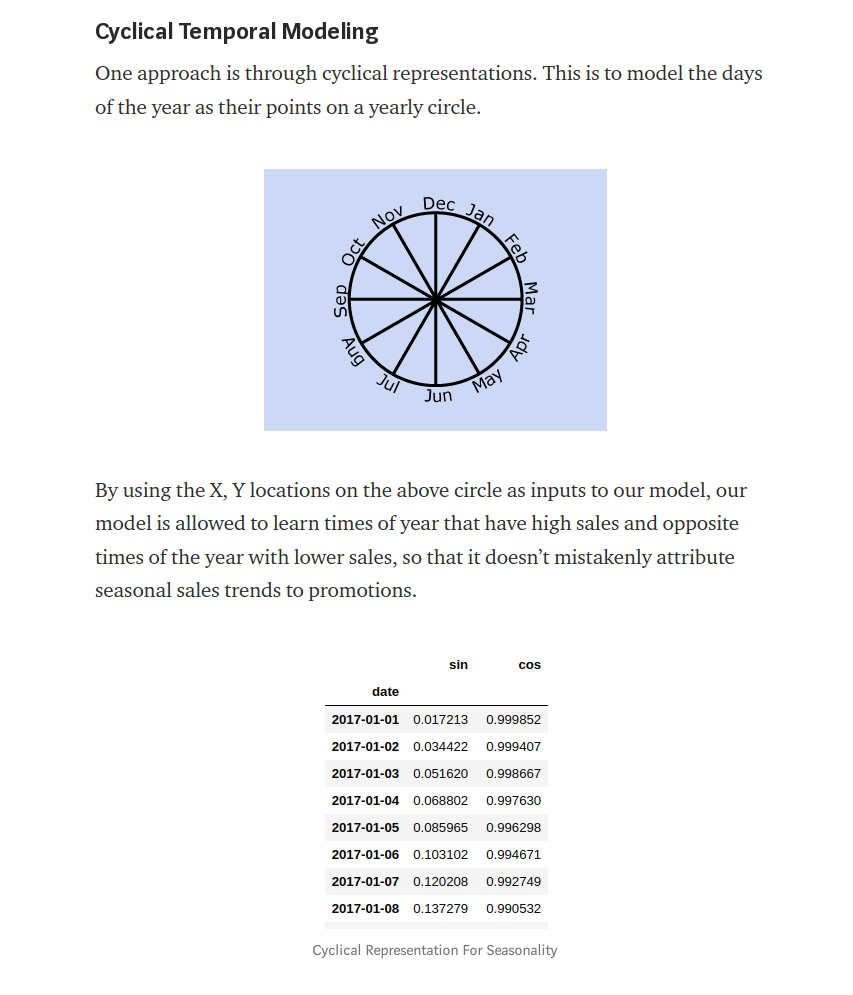

In [6]:
date = list(dataframe.day)
date = [str(item) for item in date]
date = [date[i] + '/' + list(dataframe.month)[i] for i in range(len(dataframe.day))] 

date = [int(datetime.strptime(item, '%d/%b').strftime('%j')) for item in date]
date_sin = [math.sin(date[i]/360) for i in range (len(date))]
date_cos = [math.cos(date[i]/360) for i in range (len(date))]
dataframe['date_sin'] = date_sin
dataframe['date_cos'] = date_cos
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date_sin,date_cos
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no,0.725053,0.688693
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no,0.355911,0.934520
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no,0.290208,0.956964
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no,0.414850,0.909890
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no,0.340287,0.940322


## Kodowanie zmiennych kategorycznych 

In [7]:
dataframe[["marital","education","default","housing","loan","contact","poutcome"]] = dataframe[["marital","education","default","housing","loan","contact","poutcome"]].apply(LabelEncoder().fit_transform)
a = ce.BaseNEncoder(base=2).fit_transform(dataframe["job"])
dataframe = pd.concat([dataframe, a], axis=1).drop(["job"], axis=1)
dataframe.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,previous,poutcome,y,date_sin,date_cos,job_0,job_1,job_2,job_3,job_4
0,30,1,0,0,1787,0,0,0,19,oct,...,0,3,no,0.725053,0.688693,0,0,0,0,1
1,33,1,1,0,4789,1,1,0,11,may,...,4,0,no,0.355911,0.934520,0,0,0,1,0
2,35,2,2,0,1350,1,0,0,16,apr,...,1,0,no,0.290208,0.956964,0,0,0,1,1
3,30,1,2,0,1476,1,1,2,3,jun,...,0,3,no,0.414850,0.909890,0,0,0,1,1
4,59,1,1,0,0,1,0,2,5,may,...,0,3,no,0.340287,0.940322,0,0,1,0,0


## Outliers

In [8]:
dataframe_orgin = pd.read_csv('bank_marketing_weka_dataset.csv')
upper_lim_balance = dataframe_orgin['balance'].mean() + dataframe_orgin['balance'].std() * 3
lower_lim_balance = dataframe_orgin['balance'].mean() - dataframe_orgin['balance'].std() * 3

dataframe.loc[(dataframe['balance'] > upper_lim_balance),'balance'] = upper_lim_balance
dataframe.loc[(dataframe['balance'] < lower_lim_balance),'balance'] = lower_lim_balance

upper_lim_pdays = dataframe_orgin.loc[dataframe_orgin.pdays > -1, 'pdays'].mean() + dataframe_orgin.loc[dataframe_orgin.pdays > -1, 'pdays'].std() * 3

dataframe.loc[(dataframe['pdays'] > upper_lim_pdays),'pdays'] = upper_lim_pdays

upper_lim_duration = dataframe_orgin['duration'].mean() + dataframe_orgin['duration'].std() * 3

dataframe.loc[(dataframe['duration'] > upper_lim_pdays),'duration'] = upper_lim_duration

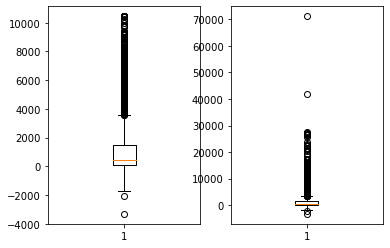

In [9]:
ig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.balance)
axs[1].boxplot(dataframe_orgin.balance)

plt.show()

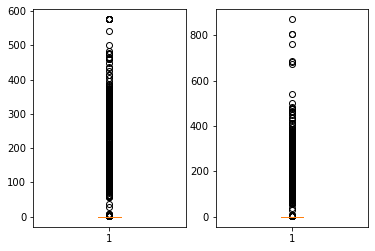

In [10]:
fig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.pdays)
axs[1].boxplot(dataframe_orgin.pdays)

plt.show()

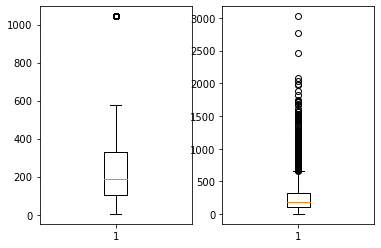

In [11]:
fig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.duration)
axs[1].boxplot(dataframe_orgin.duration)

plt.show()